# Nick Samsel - MSDS670 Final Project
## An analysis of the Minnesota Vikings 2003-2023, Frustratingly Mediocre

## Data Import


In [225]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
from io import StringIO
import random

# Base URL for Pro Football Reference
base_url = "https://www.pro-football-reference.com"

# Predefined list of team abbreviations
team_abbreviations = [
    'crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den', 'det', 'gnb', 'htx', 'clt', 'jax', 'kan',
    'rai', 'sdg', 'ram', 'mia', 'min', 'nwe', 'nor', 'nyg', 'nyj', 'phi', 'pit', 'sfo', 'sea', 'tam', 'oti', 'was'
]

# Step 1: Define a function to fetch team stats and rankings for a given season and team
def fetch_team_stats_and_rankings(season_year, team_abbreviation):
    url = f"{base_url}/teams/{team_abbreviation}/{season_year}.htm"
    retries = 5
    backoff_factor = 2
    initial_delay = 60  # Start with a 1-minute delay

    for attempt in range(retries):
        try:
            response = requests.get(url)
            response.raise_for_status()
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Extract the team stats and rankings table
            table = soup.find('table', {'id': 'team_stats'})
            if table:
                df = pd.read_html(StringIO(table.prettify()))[0]
                df['SeasonYear'] = season_year
                df['TeamAbbreviation'] = team_abbreviation
                return df
            else:
                print(f"No stats and rankings table found for team {team_abbreviation} in season {season_year}")
                return None
        except requests.exceptions.HTTPError as e:
            if response.status_code == 429:
                print(f"Error fetching data for team {team_abbreviation} in season {season_year}: {e}")
                sleep_time = initial_delay * (backoff_factor ** attempt) + random.uniform(0, 60)
                print(f"Sleeping for {sleep_time} seconds before retrying...")
                sleep(sleep_time)  # Exponential backoff with jitter
            else:
                print(f"Error fetching data for team {team_abbreviation} in season {season_year}: {e}")
                return None
        except Exception as e:
            print(f"Error fetching data for team {team_abbreviation} in season {season_year}: {e}")
            return None

# Step 2: Loop through each season from 2003 to the current year and each team to fetch the team stats and rankings
all_team_stats_and_rankings = []

for season_year in range(2003, 2023):
    for team_abbreviation in team_abbreviations:
        print(f"Fetching data for team {team_abbreviation} in season {season_year}")
        team_stats_and_rankings = fetch_team_stats_and_rankings(season_year, team_abbreviation)
        if team_stats_and_rankings is not None:
            all_team_stats_and_rankings.append(team_stats_and_rankings)
        sleep(5 + random.uniform(0, 5))  # Increase sleep interval with jitter to avoid hitting the server too frequently

# Step 3: Concatenate all the DataFrames
if all_team_stats_and_rankings:
    df = pd.concat(all_team_stats_and_rankings, ignore_index=True)

    # Step 4: Save the DataFrame to a CSV file
    df.to_csv('nfl_team_stats_and_rankings_2003_to_2023.csv', index=False)
    print("Data fetching complete. Saved to nfl_team_stats_and_rankings_2003_to_2023.csv")
else:
    print("No data fetched.")

Fetching data for team crd in season 2003
Fetching data for team atl in season 2003
Fetching data for team rav in season 2003
Fetching data for team buf in season 2003
Fetching data for team car in season 2003
Fetching data for team chi in season 2003
Fetching data for team cin in season 2003
Fetching data for team cle in season 2003
Fetching data for team dal in season 2003
Fetching data for team den in season 2003
Fetching data for team det in season 2003
Fetching data for team gnb in season 2003
Fetching data for team htx in season 2003
Fetching data for team clt in season 2003
Fetching data for team jax in season 2003
Fetching data for team kan in season 2003
Fetching data for team rai in season 2003
Fetching data for team sdg in season 2003
Fetching data for team ram in season 2003
Fetching data for team mia in season 2003
Fetching data for team min in season 2003
Fetching data for team nwe in season 2003
Fetching data for team nor in season 2003
Fetching data for team nyg in seas

In [ ]:
#Win Loss Records
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# Base URL for Pro Football Reference
base_url = "https://www.pro-football-reference.com"

# Function to fetch win-loss records for a given season
def fetch_win_loss_records(season_year):
    try:
        url = f"{base_url}/years/{season_year}/"
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Initialize a list to store records
        records = []
        
        # Process both AFC and NFC tables
        for conference in ['AFC', 'NFC']:
            record_table = soup.find('table', {'id': conference})
            if record_table is None:
                print(f"No {conference} record table found for season {season_year}")
                continue
            
            # Extract the win-loss records from the table
            for row in record_table.find('tbody').find_all('tr'):
                if row.find('th', {'scope': 'row'}) is not None:  # Skip header rows
                    team = row.find('th', {'scope': 'row'}).text
                    wins = row.find('td', {'data-stat': 'wins'}).text if row.find('td', {'data-stat': 'wins'}) else '0'
                    losses = row.find('td', {'data-stat': 'losses'}).text if row.find('td', {'data-stat': 'losses'}) else '0'
                    ties = row.find('td', {'data-stat': 'ties'}).text if row.find('td', {'data-stat': 'ties'}) else '0'
                    records.append({'Team': team, 'SeasonYear': season_year, 'Wins': wins, 'Losses': losses, 'Ties': ties})
        
        return records
    except Exception as e:
        print(f"Error fetching win-loss records for season {season_year}: {e}")
        return None

# Step 1: Loop through each season to fetch the win-loss records
all_records = []

for season_year in range(2003, 2023):  # Adjust the range as needed
    print(f"Fetching win-loss records for season {season_year}")
    records = fetch_win_loss_records(season_year)
    if records is not None:
        all_records.extend(records)
    time.sleep(1)  # Add a delay of 1 second between requests to avoid overloading the server

# Step 2: Create a DataFrame from the collected records
df_records = pd.DataFrame(all_records)

# Step 3: Save the DataFrame to a CSV file
df_records.to_csv('nfl_win_loss_records_2003_to_2023.csv', index=False)
print("Data fetching complete. Saved to nfl_win_loss_records_2003_to_2023.csv")

Fetching win-loss records for season 2003
Fetching win-loss records for season 2004
Fetching win-loss records for season 2005
Fetching win-loss records for season 2006
Fetching win-loss records for season 2007
Fetching win-loss records for season 2008
Fetching win-loss records for season 2009
Fetching win-loss records for season 2010
Fetching win-loss records for season 2011
Fetching win-loss records for season 2012
Fetching win-loss records for season 2013
Fetching win-loss records for season 2014
Fetching win-loss records for season 2015
Fetching win-loss records for season 2016
Fetching win-loss records for season 2017
Fetching win-loss records for season 2018
Fetching win-loss records for season 2019
Fetching win-loss records for season 2020
Fetching win-loss records for season 2021
Fetching win-loss records for season 2022
Data fetching complete. Saved to nfl_win_loss_records_2003_to_2023.csv


## Data Cleaning

In [251]:
import pandas as pd

# Load the data
df_team_stats = pd.read_csv('nfl_team_stats_and_rankings_2003_to_2023.csv')

# Function to make column names readable
def make_column_names_readable(columns):
    readable_columns = []
    for col in columns:
        # Replace underscores with spaces and capitalize each word
        readable_col = col.replace('_', ' ').title()
        readable_columns.append(readable_col)
    return readable_columns

# Dictionary mapping team abbreviations to full team names
team_names = {
    'crd': 'Cardinals', 'atl': 'Falcons', 'rav': 'Ravens', 'buf': 'Bills', 'car': 'Panthers', 'chi': 'Bears',
    'cin': 'Bengals', 'cle': 'Browns', 'dal': 'Cowboys', 'den': 'Broncos', 'det': 'Lions', 'gnb': 'Packers',
    'htx': 'Texans', 'clt': 'Colts', 'jax': 'Jaguars', 'kan': 'Chiefs', 'rai': 'Raiders', 'sdg': 'Chargers',
    'ram': 'Rams', 'mia': 'Dolphins', 'min': 'Vikings', 'nwe': 'Patriots', 'nor': 'Saints', 'nyg': 'Giants',
    'nyj': 'Jets', 'phi': 'Eagles', 'pit': 'Steelers', 'sfo': '49ers', 'sea': 'Seahawks', 'tam': 'Buccaneers',
    'oti': 'Titans', 'was': 'Washington'
}

# Replace team abbreviations with full team names
df_team_stats['TeamAbbreviation'] = df_team_stats['TeamAbbreviation'].replace(team_names)

# Set the first row as the header
df_team_stats.columns = df_team_stats.iloc[0]
df_team_stats = df_team_stats.drop(0).reset_index(drop=True)

# Rename the last two columns
columns = df_team_stats.columns.tolist()
columns[-1] = 'Team'
columns[-2] = 'SeasonYear'
df_team_stats.columns = columns

# Split the DataFrame into different parts
df_team_stats_team = df_team_stats[df_team_stats['Player'] == 'Team Stats'].drop(columns=['Player'])
df_team_stats_opp = df_team_stats[df_team_stats['Player'] == 'Opp. Stats'].drop(columns=['Player'])
df_team_stats_offense = df_team_stats[df_team_stats['Player'] == 'Lg Rank Offense'].drop(columns=['Player'])
df_team_stats_defense = df_team_stats[df_team_stats['Player'] == 'Lg Rank Defense'].drop(columns=['Player'])

# Add prefixes to the columns
df_team_stats_team = df_team_stats_team.add_prefix('TeamStats_')
df_team_stats_opp = df_team_stats_opp.add_prefix('OppStats_')
df_team_stats_offense = df_team_stats_offense.add_prefix('OffenseRank_')
df_team_stats_defense = df_team_stats_defense.add_prefix('DefenseRank_')

# Concatenate the DataFrames
df_team_stats = pd.concat([df_team_stats_team.reset_index(drop=True),
                           df_team_stats_opp.reset_index(drop=True),
                           df_team_stats_offense.reset_index(drop=True),
                           df_team_stats_defense.reset_index(drop=True)], axis=1)

# Add 'SeasonYear' and 'Team' columns
df_team_stats['SeasonYear'] = df_team_stats_team['TeamStats_SeasonYear']
df_team_stats['Team'] = df_team_stats_team['TeamStats_Team']

# Make column names readable
columns_list = df_team_stats.columns.tolist()
readable_columns_list = make_column_names_readable(columns_list)
df_team_stats.columns = readable_columns_list

# Drop columns with all NaN values
df_team_stats = df_team_stats.dropna(axis=1, how='all')

# Strip leading/trailing spaces from column names
df_team_stats.columns = df_team_stats.columns.str.strip()

# Drop specific columns
columns_to_drop = [
    'Team', 'Seasonyear', 'Offenserank Seasonyear', 'Offenserank Team',
    'Oppstats Team', 'Oppstats Seasonyear', 'Teamstats Team', 'Teamstats Seasonyear'
]
df_team_stats = df_team_stats.drop(columns=columns_to_drop)

# Rename columns
df_team_stats = df_team_stats.rename(columns={
    'Defenserank Seasonyear': 'SeasonYear',
    'Defenserank Team': 'Team'
})

# Convert 'SeasonYear' to int and update 'Team' names
df_team_stats['SeasonYear'] = df_team_stats['SeasonYear'].astype(int)
df_team_stats['Team'] = df_team_stats['Team'].replace('Washington', 'Commanders')

# Save the updated DataFrame to a new CSV file
df_team_stats.to_csv('updated_nfl_team_stats_and_rankings_2003_to_2023.csv', index=False)


In [4]:
# Win Loss Records Data Cleaning
import pandas as pd

# Load the CSV file
df_team_wins = pd.read_csv('nfl_win_loss_records_2003_to_2023.csv')

# Mapping dictionary with team information
team_info_mapping = {
    'Washington Football Team': {'Team': 'Commanders', 'Division': 'NFC East', 'Conference': 'NFC'},
    'New York Giants': {'Team': 'Giants', 'Division': 'NFC East', 'Conference': 'NFC'},
    'Dallas Cowboys': {'Team': 'Cowboys', 'Division': 'NFC East', 'Conference': 'NFC'},
    'Denver Broncos': {'Team': 'Broncos', 'Division': 'AFC West', 'Conference': 'AFC'},
    'Los Angeles Chargers': {'Team': 'Chargers', 'Division': 'AFC West', 'Conference': 'AFC'},
    'Kansas City Chiefs': {'Team': 'Chiefs', 'Division': 'AFC West', 'Conference': 'AFC'},
    'Las Vegas Raiders': {'Team': 'Raiders', 'Division': 'AFC West', 'Conference': 'AFC'},
    'Buffalo Bills': {'Team': 'Bills', 'Division': 'AFC East', 'Conference': 'AFC'},
    'Miami Dolphins': {'Team': 'Dolphins', 'Division': 'AFC East', 'Conference': 'AFC'},
    'New York Jets': {'Team': 'Jets', 'Division': 'AFC East', 'Conference': 'AFC'},
    'New England Patriots': {'Team': 'Patriots', 'Division': 'AFC East', 'Conference': 'AFC'},
    'Indianapolis Colts': {'Team': 'Colts', 'Division': 'AFC South', 'Conference': 'AFC'},
    'Jacksonville Jaguars': {'Team': 'Jaguars', 'Division': 'AFC South', 'Conference': 'AFC'},
    'Houston Texans': {'Team': 'Texans', 'Division': 'AFC South', 'Conference': 'AFC'},
    'Tennessee Titans': {'Team': 'Titans', 'Division': 'AFC South', 'Conference': 'AFC'},
    'Cincinnati Bengals': {'Team': 'Bengals', 'Division': 'AFC North', 'Conference': 'AFC'},
    'Cleveland Browns': {'Team': 'Browns', 'Division': 'AFC North', 'Conference': 'AFC'},
    'Baltimore Ravens': {'Team': 'Ravens', 'Division': 'AFC North', 'Conference': 'AFC'},
    'Pittsburgh Steelers': {'Team': 'Steelers', 'Division': 'AFC North', 'Conference': 'AFC'},
    'Tampa Bay Buccaneers': {'Team': 'Buccaneers', 'Division': 'NFC South', 'Conference': 'NFC'},
    'Atlanta Falcons': {'Team': 'Falcons', 'Division': 'NFC South', 'Conference': 'NFC'},
    'Carolina Panthers': {'Team': 'Panthers', 'Division': 'NFC South', 'Conference': 'NFC'},
    'New Orleans Saints': {'Team': 'Saints', 'Division': 'NFC South', 'Conference': 'NFC'},
    'San Francisco 49ers': {'Team': '49ers', 'Division': 'NFC West', 'Conference': 'NFC'},
    'Arizona Cardinals': {'Team': 'Cardinals', 'Division': 'NFC West', 'Conference': 'NFC'},
    'Los Angeles Rams': {'Team': 'Rams', 'Division': 'NFC West', 'Conference': 'NFC'},
    'Seattle Seahawks': {'Team': 'Seahawks', 'Division': 'NFC West', 'Conference': 'NFC'},
    'Philadelphia Eagles': {'Team': 'Eagles', 'Division': 'NFC East', 'Conference': 'NFC'},
    'Chicago Bears': {'Team': 'Bears', 'Division': 'NFC North', 'Conference': 'NFC'},
    'Detroit Lions': {'Team': 'Lions', 'Division': 'NFC North', 'Conference': 'NFC'},
    'Green Bay Packers': {'Team': 'Packers', 'Division': 'NFC North', 'Conference': 'NFC'},
    'Minnesota Vikings': {'Team': 'Vikings', 'Division': 'NFC North', 'Conference': 'NFC'},
    'St. Louis Rams': {'Team': 'Rams', 'Division': 'NFC West', 'Conference': 'NFC'},
    'Washington Commanders': {'Team': 'Commanders', 'Division': 'NFC East', 'Conference': 'NFC'},
    'Washington Redskins': {'Team': 'Commanders', 'Division': 'NFC East', 'Conference': 'NFC'},
    'Oakland Raiders': {'Team': 'Raiders', 'Division': 'AFC West', 'Conference': 'AFC'},
    'San Diego Chargers': {'Team': 'Chargers', 'Division': 'AFC West', 'Conference': 'AFC'}
}

# Create separate dictionaries for team names, divisions, and conferences
team_mapping = {k: v['Team'] for k, v in team_info_mapping.items()}
division_mapping = {v['Team']: v['Division'] for k, v in team_info_mapping.items()}
conference_mapping = {v['Team']: v['Conference'] for k, v in team_info_mapping.items()}

# Replace the values in the 'Team' column using regular expressions
for original, new in team_mapping.items():
    df_team_wins['Team'] = df_team_wins['Team'].str.replace(original, new, regex=True)

# Extract division winners and wild cards based on '*' and '+'
df_team_wins['DivisionWinner'] = df_team_wins['Team'].str.contains(r'\*')
df_team_wins['WildCard'] = df_team_wins['Team'].str.contains(r'\+')

# Remove '*' and '+' characters from the 'Team' column
df_team_wins['Team'] = df_team_wins['Team'].str.replace(r'[+*]', '', regex=True)

# Add division and conference columns
df_team_wins['Division'] = df_team_wins['Team'].map(division_mapping)
df_team_wins['Conference'] = df_team_wins['Team'].map(conference_mapping)

# Calculate the win-loss percentage
df_team_wins['Wins'] = pd.to_numeric(df_team_wins['Wins'], errors='coerce')
df_team_wins['Losses'] = pd.to_numeric(df_team_wins['Losses'], errors='coerce')
df_team_wins['W/L%'] = df_team_wins['Wins'] / (df_team_wins['Wins'] + df_team_wins['Losses'])

# Sort the DataFrame by SeasonYear, Conference, Division, and W/L%
df_team_wins = df_team_wins.sort_values(by=['SeasonYear', 'Conference', 'Division', 'W/L%'], ascending=[True, True, True, False])

# Function to assign playoff seeds with debugging
def assign_playoff_seeds(group):
    # Identify division winners
    division_winners = group[group['DivisionWinner']]
    division_winners = division_winners.sort_values(by='W/L%', ascending=False)
    division_winners['Playoff Seed'] = range(1, len(division_winners) + 1)
    
    # Identify wild card teams
    wild_cards = group[group['WildCard']]
    wild_cards = wild_cards.sort_values(by='W/L%', ascending=False)
    
    # Determine the number of remaining seeds based on the SeasonYear
    if group['SeasonYear'].iloc[0] >= 2020:
        remaining_seeds = 3
    else:
        remaining_seeds = 2
    
    # Ensure the number of remaining seeds does not exceed the number of wild card teams
    remaining_seeds = min(remaining_seeds, len(wild_cards))
    
    # Debugging print statements
    print(f"SeasonYear: {group['SeasonYear'].iloc[0]}, Conference: {group['Conference'].iloc[0]}")
    print(f"Division Winners: {len(division_winners)}, Wild Cards: {len(wild_cards)}, Remaining Seeds: {remaining_seeds}")
    
    # Assign playoff seeds to wild card teams
    wild_cards = wild_cards.iloc[:remaining_seeds]
    wild_cards['Playoff Seed'] = range(len(division_winners) + 1, len(division_winners) + 1 + remaining_seeds)
    
    # Combine division winners and wild card teams
    combined = pd.concat([division_winners, wild_cards])
    
    # Add non-playoff teams back into the combined DataFrame
    non_playoff_teams = group.drop(combined.index)
    non_playoff_teams['Playoff Seed'] = None
    
    # Combine all teams
    combined = pd.concat([combined, non_playoff_teams])
    
    # Debugging print statements
    print(f"Combined Length: {len(combined)}, Expected Length: {len(group)}")
    
    return combined

# Split the DataFrame by SeasonYear
seasons = df_team_wins['SeasonYear'].unique()
df_list = []

for season in seasons:
    season_df = df_team_wins[df_team_wins['SeasonYear'] == season]
    season_df = season_df.groupby(['Conference']).apply(assign_playoff_seeds).reset_index(drop=True)
    df_list.append(season_df)

# Combine the results back into a single DataFrame
df_team_wins = pd.concat(df_list).reset_index(drop=True)



SeasonYear: 2003, Conference: AFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2003, Conference: NFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2004, Conference: AFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2004, Conference: NFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2005, Conference: AFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2005, Conference: NFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2006, Conference: AFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
Combined Length: 16, Expected Length: 16
SeasonYear: 2006, Conference: NFC
Division Winners: 4, Wild Cards: 2, Remaining Seeds: 2
C

/tmp/ipykernel_1242/1305236342.py:125: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_df = season_df.groupby(['Conference']).apply(assign_playoff_seeds).reset_index(drop=True)
/tmp/ipykernel_1242/1305236342.py:125: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_df = season_df.groupby(['Conference']).apply(assign_playoff_seeds).reset_index(drop=True)
/tmp/ipykernel_1242/1305236342.py:125: Depreca

In [5]:
import pandas as pd
# Ensure the Super Bowl winner DataFrame has the correct columns
# Assuming df_playoff has columns 'SeasonYear' and 'SuperBowlWinner'
df_playoff = pd.read_csv('superbowl_winners.csv')
df_team_stats = pd.read_csv('updated_nfl_team_stats_and_rankings_2003_to_2023.csv')
df_playoff = df_playoff.rename(columns={'superbowl_winner': 'SuperBowlWinner', 'Season': 'SeasonYear'})
# Merge the Super Bowl winner DataFrame with the broader DataFrame
df_team_wins = df_team_wins.merge(df_playoff, on='SeasonYear', how='left')

# Add a column indicating the Super Bowl winner
df_team_wins['SuperBowlWinnerFlag'] = (df_team_wins['Team'] == df_team_wins['SuperBowlWinner']).astype(int)

# Drop the 'SuperBowlWinner' column if you no longer need it
df_team_wins = df_team_wins.drop(columns=['SuperBowlWinner'])

# Merge the team stats DataFrame with the broader DataFrame
# Assuming df_team_stats has columns 'SeasonYear' and 'Team' to merge on
df = df_team_wins.merge(df_team_stats, on=['SeasonYear', 'Team'], how='left')

df.rename(columns={'SuperBowlWinnerFlag': 'Super Bowl Winner'}, inplace=True)

# Convert 'DivisionWinner' column to 1 for True and 0 for False
df['DivisionWinner'] = df['DivisionWinner'].astype(int)

# Convert 'WildCard' column to 1 for True and 0 for False
df['WildCard'] = df['WildCard'].astype(int)

# Create the '1st Round Bye' column
df['1st Round Bye'] = 0
# Apply the conditions for seasons before 2020
df.loc[(df['SeasonYear'] < 2020) & (df['Playoff Seed'].isin([1, 2])), '1st Round Bye'] = 1
# Apply the conditions for the 2020 season and later
df.loc[(df['SeasonYear'] >= 2020) & (df['Playoff Seed'] == 1), '1st Round Bye'] = 1
def convert_time_to_decimal(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes + seconds / 60



df['Playoff Seed'] = df['Playoff Seed'].fillna(-1)



/tmp/ipykernel_1242/1602775817.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Playoff Seed'] = df['Playoff Seed'].fillna(-1)


In [6]:
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
df.head(32)

,Team,SeasonYear,Wins,Losses,Ties,DivisionWinner,WildCard,Division,Conference,W/L%,Playoff Seed,Super Bowl Winner,Teamstats Pf,Teamstats Yds,Teamstats Ply,Teamstats Y/P,Teamstats To,Teamstats Fl,Teamstats 1Std,Teamstats Cmp,Teamstats Att,Teamstats Yds.1,Teamstats Td,Teamstats Int,Teamstats Ny/A,Teamstats 1Std.1,Teamstats Att.1,Teamstats Yds.2,Teamstats Td.1,Teamstats Y/A,Teamstats 1Std.2,Teamstats Pen,Teamstats Yds.3,Teamstats 1Stpy,Teamstats #Dr,Teamstats Sc%,Teamstats To%,Teamstats Start,Teamstats Time,Teamstats Plays,Teamstats Yds.4,Teamstats Pts,Oppstats Pf,Oppstats Yds,Oppstats Ply,Oppstats Y/P,Oppstats To,Oppstats Fl,Oppstats 1Std,Oppstats Cmp,Oppstats Att,Oppstats Yds.1,Oppstats Td,Oppstats Int,Oppstats Ny/A,Oppstats 1Std.1,Oppstats Att.1,Oppstats Yds.2,Oppstats Td.1,Oppstats Y/A,Oppstats 1Std.2,Oppstats Pen,Oppstats Yds.3,Oppstats 1Stpy,Oppstats #Dr,Oppstats Sc%,Oppstats To%,Oppstats Start,Oppstats Time,Oppstats Plays,Oppstats Yds.4,Oppstats Pts,Offenserank Pf,Offenserank Yds,Offenserank To,Offenserank Fl,Offenserank 1Std,Offenserank Att,Offenserank Yds.1,Offenserank Td,Offenserank Int,Offenserank Ny/A,Offenserank Att.1,Offenserank Yds.2,Offenserank Td.1,Offenserank Y/A,Offenserank Sc%,Offenserank To%,Offenserank Start,Offenserank Time,Offenserank Plays,Offenserank Yds.3,Offenserank Pts,Defenserank Pf,Defenserank Yds,Defenserank To,Defenserank Fl,Defenserank 1Std,Defenserank Att,Defenserank Yds.1,Defenserank Td,Defenserank Int,Defenserank Ny/A,Defenserank Att.1,Defenserank Yds.2,Defenserank Td.1,Defenserank Y/A,Defenserank Sc%,Defenserank To%,Defenserank Start,Defenserank Time,Defenserank Plays,Defenserank Yds.3,Defenserank Pts,1st Round Bye
0,Patriots,2003,14,2,0,1,0,AFC East,AFC,0.8750,1,1,348.0,5039.0,1042.0,4.8,24.0,11.0,294.0,320.0,537.0,3432.0,23.0,13.0,6.0,177.0,473.0,1607.0,9.0,3.4,91.0,111.0,998.0,26.0,204.0,27.9,11.3,Own 33.3,0.10,5.27,24.6,1.47,238.0,4666.0,1060.0,4.4,41.0,12.0,293.0,328.0,618.0,3232.0,11.0,29.0,4.9,177.0,401.0,1434.0,10.0,3.6,91.0,107.0,845.0,25.0,200.0,23.0,19.5,Own 30.6,0.10,5.5,23.5,1.11,12.0,17.0,7.0,13.0,16.0,6.0,9.0,11.0,6.0,13.0,12.0,27.0,24.0,30.0,18.0,27.0,5.0,22.0,25.0,22.0,19.0,1.0,7.0,2.0,13.0,17.0,32.0,15.0,1.0,1.0,2.0,4.0,4.0,6.0,6.0,32.0,2.0,8.0,6.0,18.0,4.0,1.0,1
1,Chiefs,2003,13,3,0,1,0,AFC West,AFC,0.8125,2,0,484.0,5910.0,1003.0,5.9,18.0,6.0,348.0,339.0,536.0,3981.0,24.0,12.0,7.1,201.0,446.0,1929.0,32.0,4.3,120.0,79.0,698.0,27.0,188.0,38.3,8.5,Own 32.3,0.10,5.44,31.3,2.34,332.0,5707.0,1054.0,5.4,37.0,12.0,322.0,332.0,565.0,3363.0,19.0,25.0,5.6,184.0,453.0,2344.0,18.0,5.2,120.0,95.0,781.0,18.0,190.0,29.5,17.4,Own 30.0,0.11,5.7,30.0,1.66,1.0,2.0,1.0,2.0,1.0,7.0,2.0,10.0,5.0,2.0,16.0,15.0,1.0,11.0,4.0,32.0,10.0,20.0,18.0,3.0,2.0,19.0,29.0,4.0,13.0,27.0,29.0,20.0,13.0,3.0,12.0,18.0,30.0,26.0,32.0,20.0,4.0,4.0,17.0,25.0,27.0,18.0,1
2,Colts,2003,12,4,0,1,0,AFC South,AFC,0.7500,3,0,447.0,5874.0,1041.0,5.6,20.0,10.0,348.0,381.0,569.0,4179.0,29.0,10.0,7.1,212.0,453.0,1695.0,16.0,3.7,104.0,92.0,662.0,32.0,177.0,46.3,10.2,Own 31.8,0.12,6.09,33.2,2.41,336.0,4789.0,913.0,5.2,30.0,15.0,279.0,277.0,445.0,2809.0,18.0,15.0,5.9,138.0,437.0,1980.0,19.0,4.5,117.0,123.0,1005.0,24.0,176.0,30.1,14.8,Own 29.9,0.11,5.3,27.2,1.74,2.0,3.0,2.0,10.0,1.0,5.0,1.0,4.0,3.0,3.0,13.0,19.0,9.0,26.0,1.0,29.0,14.0,3.0,1.0,2.0,1.0,20.0,11.0,12.0,4.0,11.0,1.0,5.0,9.0,14.0,19.0,10.0,20.0,28.0,24.0,17.0,13.0,3.0,26.0,9.0,17.0,22.0,0
3,Ravens,2003,10,6,0,1,0,AFC North,AFC,0.6250,4,0,391.0,4929.0,1009.0,4.9,38.0,19.0,259.0,217.0,415.0,2255.0,16.0,19.0,4.9,121.0,552.0,2674.0,18.0,4.8,115.0,126.0,970.0,23.0,217.0,31.8,16.6,Own 35.0,0.09,4.83,22.7,1.60,281.0,4341.0,1026.0,4.2,41.0,17.0,248.0,296.0,531.0,2805.0,19.0,24.0,4.9,144.0,448.0,1536.0,6.0,3.4,78.0,106.0,935.0,26.0,218.0,24.3,16.5,Own 31.2,0.09,4.8,19.9,1.19,8.0,21.0,30.0,31.0,27.0,32.0,32.0,26.0,21.0,27.0,1.0,1.0,5.0,3.0,13.0,7.0,1.0,31.0,31.0,30.0,14.0,6.0,3.0,2.0,2.0,3.0,25.0,4.0,13.0,4.0,1.0,14.0,6.0,1.0,3.0,30.0,7.0,15.0,1.0,1.0,1.0,2.0,0
4,Titans,2003,12,4

In [7]:
import pandas as pd

# Assuming df is your DataFrame
for column in df.columns:
    try:
        # Attempt to convert the column to integer
        df[column] = df[column].astype(int)
    except ValueError:
        # If conversion fails, leave the column as it is
        pass

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Print the data types of all columns
print(df.dtypes)

Team                 object
SeasonYear            int64
Wins                  int64
Losses                int64
Ties                  int64
DivisionWinner        int64
WildCard              int64
Division             object
Conference           object
W/L%                  int64
Playoff Seed          int64
Super Bowl Winner     int64
Teamstats Pf          int64
Teamstats Yds         int64
Teamstats Ply         int64
Teamstats Y/P         int64
Teamstats To          int64
Teamstats Fl          int64
Teamstats 1Std        int64
Teamstats Cmp         int64
Teamstats Att         int64
Teamstats Yds.1       int64
Teamstats Td          int64
Teamstats Int         int64
Teamstats Ny/A        int64
Teamstats 1Std.1      int64
Teamstats Att.1       int64
Teamstats Yds.2       int64
Teamstats Td.1        int64
Teamstats Y/A         int64
Teamstats 1Std.2      int64
Teamstats Pen         int64
Teamstats Yds.3       int64
Teamstats 1Stpy       int64
Teamstats #Dr         int64
Teamstats Sc%       

## Modeling

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

modeling_df = df.drop(columns=['Team', 'SeasonYear', 'Conference', 'Division', 'Super Bowl Winner','Wins','Losses','Oppstats Start','Teamstats Start'])

# Count the number of missing values in each column
missing_values = modeling_df.isnull().sum()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming df is your original DataFrame and modeling_df is already created
# Add the target variable back to the modeling_df
modeling_df['Super Bowl Winner'] = df['Super Bowl Winner']

# Separate features and target variable
X = modeling_df.drop(columns=['Super Bowl Winner'])
y = modeling_df['Super Bowl Winner']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Variables to keep track of the best model
best_model_name = None
best_model = None
best_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model

# Print the best model's results
if best_model_name:
    y_pred = best_model.predict(X_test)
    print(f'Best Model: {best_model_name}')
    print(f'Accuracy: {best_accuracy:.2f}')
    print(classification_report(y_test, y_pred, zero_division=0))

/tmp/ipykernel_343069/2339453444.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modeling_df['Super Bowl Winner'] = df['Super Bowl Winner']


Best Model: Random Forest
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       0.00      0.00      0.00         4

    accuracy                           0.97       128
   macro avg       0.48      0.50      0.49       128
weighted avg       0.94      0.97      0.95       128



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your original DataFrame and modeling_df is already created
# Add the target variable back to the modeling_df
modeling_df['Super Bowl Winner'] = df['Super Bowl Winner']

# Separate features and target variable
X = modeling_df.drop(columns=['Super Bowl Winner'])
y = modeling_df['Super Bowl Winner']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Random Forest Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Print feature importances
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

Random Forest Model Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       0.00      0.00      0.00         4

    accuracy                           0.97       128
   macro avg       0.48      0.50      0.49       128
weighted avg       0.94      0.97      0.95       128



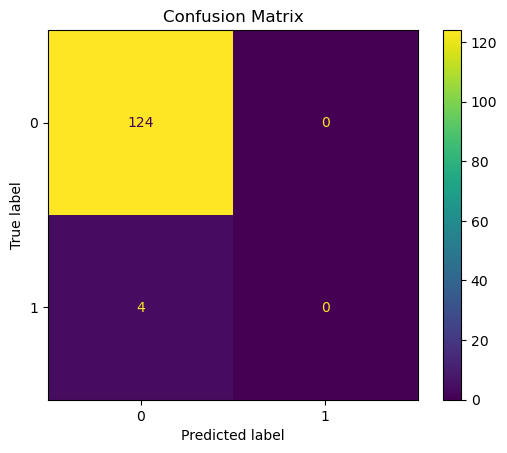

Top 10 Features in terms of importance:
            Feature  Importance
49     Oppstats Yds    0.027285
25    Teamstats Yds    0.026918
34      Oppstats Pf    0.024624
62     Oppstats Pts    0.023698
43     Oppstats Yds    0.023639
98  Defenserank Sc%    0.022785
28    Teamstats Sc%    0.021665
96   Defenserank Td    0.019637
54     Oppstats Yds    0.018485
37     Oppstats Y/P    0.017866


In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame and modeling_df is already created
# Add the target variable back to the modeling_df
modeling_df['Super Bowl Winner'] = df['Super Bowl Winner']

# Separate features and target variable
X = modeling_df.drop(columns=['Super Bowl Winner'])
y = modeling_df['Super Bowl Winner']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Random Forest model with the specified hyperparameters
rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Print feature importances
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_10_features = importance_df.head(10)
print("Top 10 Features in terms of importance:")
print(top_10_features)

## EDA

In [9]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'SeasonYear' is integer
df['SeasonYear'] = df['SeasonYear'].astype(int)

# List of columns to plot
columns_to_plot = [
    'Oppstats Yds', 'Teamstats Yds', 'Oppstats Pf', 'Oppstats Pts', 'Oppstats Yds',
    'Defenserank Sc%', 'Teamstats Sc%', 'Defenserank Td', 'Oppstats Yds', 'Oppstats Y/P'
]

# Loop through each column and create a plot
for column in columns_to_plot:
    # Convert the column to numeric and then to integer
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)
    
    # Filter data for Vikings
    vikings_data = df[df['Team'] == 'Vikings']
    
    # Filter data for Super Bowl-winning teams
    super_bowl_winners = df[df['Super Bowl Winner'] == True]
    
    # Calculate league average excluding Vikings and Super Bowl winners
    league_avg = df[~df['Team'].isin(['Vikings']) & ~df['Super Bowl Winner']].groupby('SeasonYear')[column].mean().reset_index()
    
    # Create a figure
    fig = go.Figure()
    
    # Add a line for the Vikings
    fig.add_trace(go.Scatter(x=vikings_data['SeasonYear'], y=vikings_data[column],
                             mode='lines', name='Vikings', line=dict(color='purple', width=4)))
    
    # Add a line for the Super Bowl-winning teams
    fig.add_trace(go.Scatter(x=super_bowl_winners['SeasonYear'], y=super_bowl_winners[column],
                             mode='lines', name='Super Bowl Winners', line=dict(color='orange', width=4, dash='dash')))
    
    # Add a line for the league average excluding Vikings and Super Bowl winners
    fig.add_trace(go.Scatter(x=league_avg['SeasonYear'], y=league_avg[column],
                             mode='lines', name=f'League Avg (Excl. Vikings & SB Winners)', line=dict(color='blue', width=4, dash='dot')))
    
    # Update layout and remove legend
    fig.update_layout(title=f'{column} per Season: Vikings vs. Super Bowl Winners vs. League Avg',
                      xaxis_title='Season Year',
                      yaxis_title=column,
                      showlegend=False)  # Remove legend
    
    # Show the plot
    fig.show()

In [10]:
import pandas as pd
import plotly.express as px

# Load your DataFrame (assuming df is already loaded)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if needed

# Ensure 'Offenserank Pts' and 'Defenserank Pts' are numeric
df['Offenserank Pts'] = pd.to_numeric(df['Offenserank Pts'], errors='coerce').fillna(0)
df['Defenserank Pts'] = pd.to_numeric(df['Defenserank Pts'], errors='coerce').fillna(0)

# Calculate the average Offenserank Pts and Defenserank Pts by franchise
avg_stats = df.groupby('Team')[['Offenserank Pts', 'Defenserank Pts']].mean().reset_index()

# Identify Super Bowl-winning franchises
super_bowl_winners = df[df['Super Bowl Winner'] == True]['Team'].unique()

# Create a column to identify the type of franchise
avg_stats['Franchise Type'] = avg_stats['Team'].apply(
    lambda x: 'Vikings' if x == 'Vikings' else ('Super Bowl Winner' if x in super_bowl_winners else 'Other')
)

# Create the scatter plot
fig = px.scatter(avg_stats, x='Offenserank Pts', y='Defenserank Pts', color='Franchise Type',
                 color_discrete_map={'Vikings': 'purple', 'Super Bowl Winner': 'orange', 'Other': 'blue'},
                 title='Average Offenserank Pts vs Defenserank Pts by Franchise',
                 labels={'Offenserank Pts': 'Average Offenserank Pts', 'Defenserank Pts': 'Average Defenserank Pts'},
                 hover_data=['Team'])

# Update layout to ensure the plot is a square
fig.update_layout(
    legend_title_text='Franchise Type',
    xaxis=dict(constrain='domain'),
    yaxis=dict(scaleanchor='x', scaleratio=1)
)

# Show the plot
fig.show()

In [19]:
# Ensure 'SeasonYear' is integer
df['SeasonYear'] = df['SeasonYear'].astype(int)

# Ensure 'Wins' and 'Losses' are numeric
df['Wins'] = pd.to_numeric(df['Wins'], errors='coerce').fillna(0)
df['Losses'] = pd.to_numeric(df['Losses'], errors='coerce').fillna(0)

# Calculate W/L%
df['W/L%'] = df['Wins'] / (df['Wins'] + df['Losses'])

# Calculate league average W/L% by season
league_avg = df.groupby('SeasonYear')['W/L%'].mean().reset_index()

# Filter data for Vikings
vikings_data = df[df['Team'] == 'Vikings']

# Identify Super Bowl winners for each season
super_bowl_winners = df[df['Super Bowl Winner'] == True]

# Create a figure
fig = go.Figure()

# Add a line for the league average
fig.add_trace(go.Scatter(x=league_avg['SeasonYear'], y=league_avg['W/L%'],
                         mode='lines', name='League Avg', line=dict(color='blue', width=4, dash='dot')))

# Add a line for the Vikings
fig.add_trace(go.Scatter(x=vikings_data['SeasonYear'], y=vikings_data['W/L%'],
                         mode='lines', name='Vikings', line=dict(color='purple', width=4)))

# Add a line for the Super Bowl-winning teams
fig.add_trace(go.Scatter(x=super_bowl_winners['SeasonYear'], y=super_bowl_winners['W/L%'],
                         mode='lines', name='Super Bowl Winners', line=dict(color='orange', width=4, dash='dash')))

# Update layout
fig.update_layout(title='W/L% by Season: League Avg vs. Vikings vs. Super Bowl Winners',
                  xaxis_title='Season Year',
                  yaxis_title='W/L%',
                  legend_title='Team')

# Show the plot
fig.show()

In [23]:
import pandas as pd
import plotly.graph_objects as go

# Load your DataFrame (assuming df is already loaded)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if needed

# Ensure 'DivisionWinner' is numeric (assuming 1 for True and 0 for False)
df['DivisionWinner'] = df['DivisionWinner'].astype(int)

# List of NFC North teams
nfc_north_teams = ['Vikings', 'Packers', 'Bears', 'Lions']

# Filter data for NFC North teams
nfc_north_data = df[df['Team'].isin(nfc_north_teams)]

# Calculate average DivisionWinner for each NFC North team
nfc_north_avg = nfc_north_data.groupby('Team')['DivisionWinner'].mean().reset_index()

# Create a figure
fig = go.Figure()

# Add columns for each NFC North team
for team in nfc_north_teams:
    team_avg = nfc_north_avg[nfc_north_avg['Team'] == team]['DivisionWinner'].values[0]
    fig.add_trace(go.Bar(x=[team], y=[team_avg], name=team))

# Update layout
fig.update_layout(title='Division Winner Comparison: NFC North Teams',
                  xaxis_title='Team',
                  yaxis_title='Average Division Winner',
                  barmode='group',
                  legend_title='Team')

# Show the plot
fig.show()

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Load your DataFrame (assuming df is already loaded)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if needed

# Ensure 'DivisionWinner' is numeric (assuming 1 for True and 0 for False)
df['DivisionWinner'] = df['DivisionWinner'].astype(int)

# Calculate overall league average DivisionWinner
league_avg = df['DivisionWinner'].mean()

# Calculate Vikings average DivisionWinner
vikings_avg = df[df['Team'] == 'Vikings']['DivisionWinner'].mean()

# Create a figure
fig = go.Figure()

# Add a column for the league average
fig.add_trace(go.Bar(x=['League Avg'], y=[league_avg],
                     name='League Avg', marker_color='blue'))

# Add a column for the Vikings
fig.add_trace(go.Bar(x=['Vikings'], y=[vikings_avg],
                     name='Vikings', marker_color='purple'))

# Update layout
fig.update_layout(title='Overall Division Winner Comparison: League Avg vs. Vikings',
                  xaxis_title='Team',
                  yaxis_title='Average Division Winner',
                  barmode='group',
                  legend_title='Team')

# Show the plot
fig.show()

In [24]:
import pandas as pd
import plotly.graph_objects as go

# Load your DataFrame (assuming df is already loaded)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if needed

# Ensure 'Wins' and 'Losses' are numeric
df['Wins'] = pd.to_numeric(df['Wins'], errors='coerce').fillna(0)
df['Losses'] = pd.to_numeric(df['Losses'], errors='coerce').fillna(0)

# Calculate W/L%
df['W/L%'] = df['Wins'] / (df['Wins'] + df['Losses'])

# Calculate average W/L% for Super Bowl winners
super_bowl_winners_avg = df[df['Super Bowl Winner'] == True]['W/L%'].mean()

# Calculate average W/L% for the Vikings
vikings_avg = df[df['Team'] == 'Vikings']['W/L%'].mean()

# Calculate average W/L% for non-Super Bowl winners
non_super_bowl_winners_avg = df[df['Super Bowl Winner'] == False]['W/L%'].mean()

# Create a figure
fig = go.Figure()

# Add a column for Super Bowl winners
fig.add_trace(go.Bar(x=['Super Bowl Winners'], y=[super_bowl_winners_avg],
                     name='Super Bowl Winners', marker_color='orange'))

# Add a column for the Vikings
fig.add_trace(go.Bar(x=['Vikings'], y=[vikings_avg],
                     name='Vikings', marker_color='purple'))

# Add a column for non-Super Bowl winners
fig.add_trace(go.Bar(x=['Non Super Bowl Winners'], y=[non_super_bowl_winners_avg],
                     name='Non Super Bowl Winners', marker_color='blue'))

# Update layout
fig.update_layout(title='Average W/L% Comparison: Super Bowl Winners vs. Vikings vs. Non Super Bowl Winners',
                  xaxis_title='Team Category',
                  yaxis_title='Average W/L%',
                  barmode='group',
                  legend_title='Team Category')

# Show the plot
fig.show()